# Deep Learning: Introduction with Venn Diagrams

"Deep learning" has been a challenge to define for many years, partly because it has been evolving. Perhaps a few Venn diagrams would help.

1. The original Venn diagram from Drew Conway:

<img src="https://images.squarespace-cdn.com/content/v1/5150aec6e4b0e340ec52710a/1364352051365-HZAS3CLBF7ABLE3F5OBY/ke17ZwdGBToddI8pDm48kB2M2-8_3EzuSSXvzQBRsa1Zw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpxPe_8B-x4gq2tfVez1FwLYYZXud0o-3jV-FAs7tmkMHY-a7GzQZKbHRGZboWC-fOc/Data_Science_VD.png?format=1500w">

2. However, it turns out it was incomplete, the improved version 2.0 is this:

<img src="https://3.bp.blogspot.com/-bvQxcwfqATQ/V-E_uTBc4VI/AAAAAAAAMGQ/Qa1Ntef-rs0E-mWx5pkVu-CPlREdvD0TwCLcB/s1600/VennDiagram2.png" width=800>

3. The standard Venn diagram defining "deep learning" is this:

<img src="https://miro.medium.com/max/962/0*MLoBkTeTBu6Of2Xj" width=400>

A few alternative definitions:


1.   **Deep learning has to do with complex neural networks.** [Patterson&Gibson] Here "complex" refers to neural networks which a) are not from the 80's, b) have a lot of neurons c) have a lot of connections d) are run on powerful computers e) are able to automatically extract features in the data.
2.   **Deep learning is a class of machine learning algorithms that uses multiple layers to progressively extract higher-level features from the raw input.** [Wikipedia] 





<img src="https://qph.fs.quoracdn.net/main-qimg-3a839e177d70b43dd83dc77c486dad36">

One last Venn diagram which may help in your job search:

<img src="https://3.bp.blogspot.com/-L_utsSrIS38/V-Fv5V4e98I/AAAAAAAAMHc/Jx6H2Zfk148bBt3p5-wzrwwi-lsXoijdQCLcB/s400/aiQeT.png" width=500>

# Artificial Neural Networks: Basic Components

## Artificial neuron

<img src="https://miro.medium.com/max/3000/1*WRG_Re8vGVuHDYigtq2IBA.jpeg" width=700>

For a given artificial neuron, let there be $m$ inputs with signals $x_1$ through $x_m$ arriving along $m$ connections with weights $\omega_0$ through $\omega_m$. The neuron computes the sum

$$
\sum_{i=1}^m \omega_i x_i + b = \vec{\omega}\cdot \vec{x} + b
$$

where $b$ is the bias. The activation function $\varphi$ then maps this sum to a single output $y$:

$$
y = \varphi(\vec{\omega}\cdot \vec{x} + b)
$$

## The basic structure of a neural network

<img src="https://www.researchgate.net/publication/329216193/figure/fig3/AS:697582816870406@1543328112943/Architecture-of-multilayer-artificial-neural-network-with-error-backpropagation.png">

# A First Look at a Neural Network

## The MNIST dataset of handwritten digits (28x28)

Let's build a neural network which uses the Python library Keras to learn to classify the handwritten digits from the MNIST dataset: 28x28 pixels of grayscale images into 10 categories (0 through 9). The MNIST dataset has 60,000 training images and 10,000 test images. 

In [13]:
#!pip install --upgrade pip
#!pip install tensorflow
#!pip install keras
import keras
keras.__version__

'2.4.3'

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


The MNIST dataset comes preloaded in Keras as a set of four Numpy arrays: train_images and train_labels form the training set, while test_images and test_labels form the test set. 

In [15]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Look at the training data first: note that the grayscale is an integer between 0 and 255. We will have to rescale it later to be between 0 and 1.



In [16]:
train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [19]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Look at a few examples:

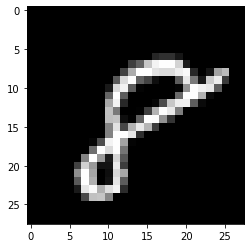

In [20]:
# show one training sample
image = train_images[-1]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

Then look at the test data:

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

In [23]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

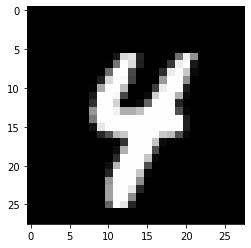

In [24]:
# show one training sample
image = test_images[-3]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

## Building the network


Let's build a very simple network with no hidden layers, i.e., with only two layers (fully connected). Since we are classifying 10 possible digits, the output layer is a 10-way softmax layer which will return an array of 10 probability scores (summing to 1). Each score is the probability that the current digit image belongs to the corresponding digit class.  

Now, what about the remaining input layer? Recall that the image contains 28x28=784 pixels, so one possibility is to feed each pixel to its own neuron in the input layer.
[Quiz: How many parameters does the input layer have in this case? Answer: 784+784=1568.]

<img src="https://ml4a.github.io/images/figures/mnist_1layer.png">

However, there is also another possibility (which may seem like an overkill): feed **each** pixel to **each** neuron in the input layer:

<img src="https://ml4a.github.io/images/figures/mnist_2layers.png">

How many parameters does the input layer have in this case? Let's say we choose 512 neurons in the input layer. The number of weights is 784x512=401,408 and the number of biases in the input layer is 512; therefore the total number of parameters is 401,408+512=401,920!

In [35]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Note that the input layer requires an extra parameter "input_shape" to specify the format of the input data. This is needed in order to define the size of the weight matrix for the input layer.

For the subsequent layers, we don't have to specify this information because the program already knows how many neurons are in each layer. For example, the second layer has 512x10=5120 weights and 10 biases for a total of 5130 parameters.

In order to make the network ready for training, we have to specify three more things: 

1. A **loss function**, i.e., how to calculate the penalty for getting the answers wrong in the training data. 
2. An **optimizer**, i.e., the mechanism for updating the weights.
3. The **metrics** used to evaluate the performance. Here we only care about the accuracy of the classification.

We will see and discuss some other options later.

In [21]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we need to preprocess the data:

1. Reshaping it into the shape that the network expects.
2. Scaling it so that the values are between 0 and 1.



In [22]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, since this is what the loss function "categorical_crossentropy" expects:

$$
L = - \sum_{i=1}^C y_i \log \hat y_i
$$

Here $C=10$ is the number of categories, $y_i$ is the truth label for the $i$-th category (either zero or one) and $\hat y_i$ is the NN output for the $i$-th category. In our case here, the activation function for the output layer was the softmax function

$$
\hat y_i = \sigma(\vec{s})_i = \frac{e^{s_i}}{\sum_{j=1}^C e^{s_j}}
$$
where $s_i$ is the sum computed by the $i$-th neuron in the output layer. 

There is only one element of the target vector $\vec{y}$ which is non-zero, and furthermore, that element is equal to 1. This element marks the true class "c", so that the loss function in this case can be simplified as

$$
L = - \log \left( \frac{e^{s_c}}{\sum_{j=1}^C e^{s_j}} \right)
$$

Basically "to_categorical" is one-hot encoding the original categorical label from an integer in [0,9] to a 10-dimensional unit vector.

In [23]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Next we train the network. In Keras this is done with a call to the "fit" method - we **fit** the model to its training data. 

In [24]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2572 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1049 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0697 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0499 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0373 - accuracy: 0.9890


Two quantities are displayed during the training: the loss and the accuracy over the training data. In this case 5 epochs are sufficient to reach a decent accuracy of 98.9\%.

Now let us check the performance of the trained model on the test data:

In [25]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9780


In [26]:
print('test_acc:', test_acc)

test_acc: 0.9779999852180481


The test accuracy is 97.8\% which is less than the 98.9\% achieved during training. This gap is an indication of overfitting.

## What did the network actually learn?

This is the result from the simpler version of our network (with one pixel per neuron in the input layer). The lowest weight is black, the highest weight is white. 

<img src="https://ml4a.github.io/images/figures/rolled_weights_mnist.png">

Even though the network did not know the shape of the digits, it found decent approximations for them. It is as if the digits from each class have been averaged.  

# Variations in the network architecture

For a complete list of available network components refer to the <a href="https://keras.io/api/">Keras documentation</a>.

## Activation function

See the complete list of <a href="https://keras.io/api/layers/activations/">layer activation functions</a> in Keras.

<img src="https://www.researchgate.net/profile/Vivienne_Sze/publication/315667264/figure/fig3/AS:669951052496900@1536740186369/Various-forms-of-non-linear-activation-functions-Figure-adopted-from-Caffe-Tutorial.png" width=700>


## Loss function

See the list of available <a href="https://keras.io/api/losses/">loss functions</a> in Keras. 

For **regression**, some commonly used loss functions are

1. <a href="https://keras.io/api/losses/regression_losses/#meansquarederror-class">Mean squared error</a>
2. <a href="https://keras.io/api/losses/regression_losses/#meanabsoluteerror-class">Mean absolute error</a>
3. <a href="https://keras.io/api/losses/regression_losses/#meanabsolutepercentageerror-class">Mean absolute percentage error</a>
4. <a href="https://keras.io/api/losses/regression_losses/#meansquaredlogarithmicerror-class">Mean squared logarithmic error</a>


For **categorization**, some commonly used loss functions are

1. <a href="https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class">Binary cross-entropy</a> (for 2 classes)
2. <a href="https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class">Categorical cross-entropy</a>
3. <a href="https://keras.io/api/losses/hinge_losses/#hinge-class">Hinge loss</a>. With the conventions $y=\pm1$ it is given by
$$
L = \max \left(0, 1-y\hat y\right)
$$


## Optimizer

See the list of available <a href="https://keras.io/api/optimizers/">optimizers</a> in Keras. The basic one is stochastic gradient descent (SGD).

For further information refer to <a href="https://ruder.io/optimizing-gradient-descent/index.html">the blog</a>,
<a href="https://www.slideshare.net/SebastianRuder/optimization-for-deep-learning">the slides</a> or 
<a href="https://arxiv.org/abs/1609.04747">the review paper</a>.


## Metrics

A metric is a function that is used to judge the performance of the model.
Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.



## Hyperparameters

In addition to model parameters, we also have additional parameters which can be tuned to make the networks train faster and better. Hyperparameter selection focuses on ensuring that the model neither overfits nor underfits the training data, while learning the structure of the data as quickly as possible.

1. **Layer number and size.** Self-explanatory.
2. **Learning rate.** It affects the rate at which the network parameters are adjusted during optimization. It is a coefficient that scales the size of the steps (updates) that the network takes on its way to the minimum. If the error is large and the gradient is steep, the step is large and there is a danger to overshoot the minimum. On the other hand, if the step is too small, we will crawl too slowly towards the minimum, and training will take a long time. The learning rate can be constant or adjusted dynamically.
3. **Regularization.** Regularization helps with the effects of out-of-control parameters by limiting parameter size. Operationally this is done by adding to the loss function a cost associated with the size of the weights: either L1 (absolute values) or L2 (squares). 
4. **Momentum.** A picture is worth a thousand words:
<a href="https://distill.pub/2017/momentum/">Why momentum really works</a>.



## Built-in small datasets

The **tf.keras.datasets** module provides a few toy <a href="https://keras.io/api/datasets/">datasets</a> (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples. We will explore those next time in team exercises.